In [1]:
pwd

'/Users/dperiel/Projects/run_dino_jump'

In [27]:
%pylab inline
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [28]:
canvas_night = cv.imread('./test_assets/night_1.png')
canvas_day = cv.imread('./test_assets/day_1.png')
print(canvas_day.shape)

(686, 1306, 3)


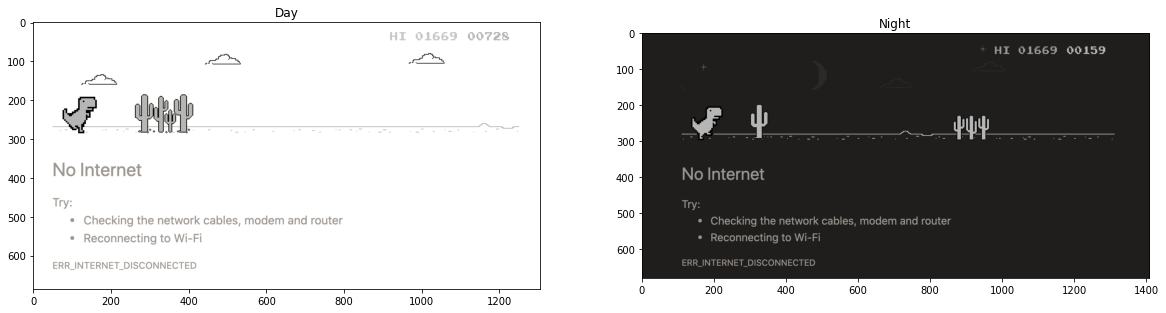

In [38]:
# plt.figure(figsize=(20,6))
_, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].imshow(canvas_day)
ax[0].set_title('Day')
ax[1].imshow(canvas_night)
ax[1].set_title('Night')
plt.show()